# Data 3112020

## Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

## Using pandas to get file and store as the variable "data":
### Print first 5 lines of data to confirm

In [2]:
data = pd.read_csv(r"C:\Users\jaime\OneDrive\Documents\Jumpstart Data\3112020.csv")
print(data.head())

              t  kic_degree_ra   kic_deg
0      0.000000      290.30865  38.25221
1   7783.783784      290.30865  38.25221
2  15567.567568      290.30865  38.25221
3  23351.351351      290.30865  38.25221
4  31135.135135      290.30865  38.25221


## Setting "x" and "y" to the difference from the mean and converting units from degrees to pixels:

In [3]:
def get_pix(deg, pix_deg_conversion):
    """function takes a value in degrees and returns converted value in pixels
    parameter: deg - int, initial value in degrees
    parameter: pix_deg_conversion - int, conversion ratio between pixels and degrees
    returns: int, converted value in pixels
    """
    pix = deg*pix_deg_conversion
    return pix

#finding mean value for right acension
degree_ra_mean = data.kic_degree_ra.mean()

#finding mean value for declenation
degree_dec_mean = data.kic_deg.mean()

#setting x to the difference of the right ascension values from the mean
x = [degree_ra_mean - data.kic_degree_ra]

#converting x values from degrees to pixels
x_pix = [get_pix(i, (60**2)/4) for i in x]

#setting y to the difference of the declenation values from the mean
y = [degree_dec_mean - data.kic_deg]

#converting y values from degrees to pixels
y_pix = [get_pix(i, (60**2)/4) for i in y]
print(x_pix)

[0      0.000007
1      0.000007
2      0.000007
3      0.000008
4      0.000008
         ...   
995   -0.000008
996   -0.000008
997   -0.000008
998   -0.000008
999   -0.000008
Name: kic_degree_ra, Length: 1000, dtype: float64]


## Plotting the data:

<IPython.core.display.Javascript object>


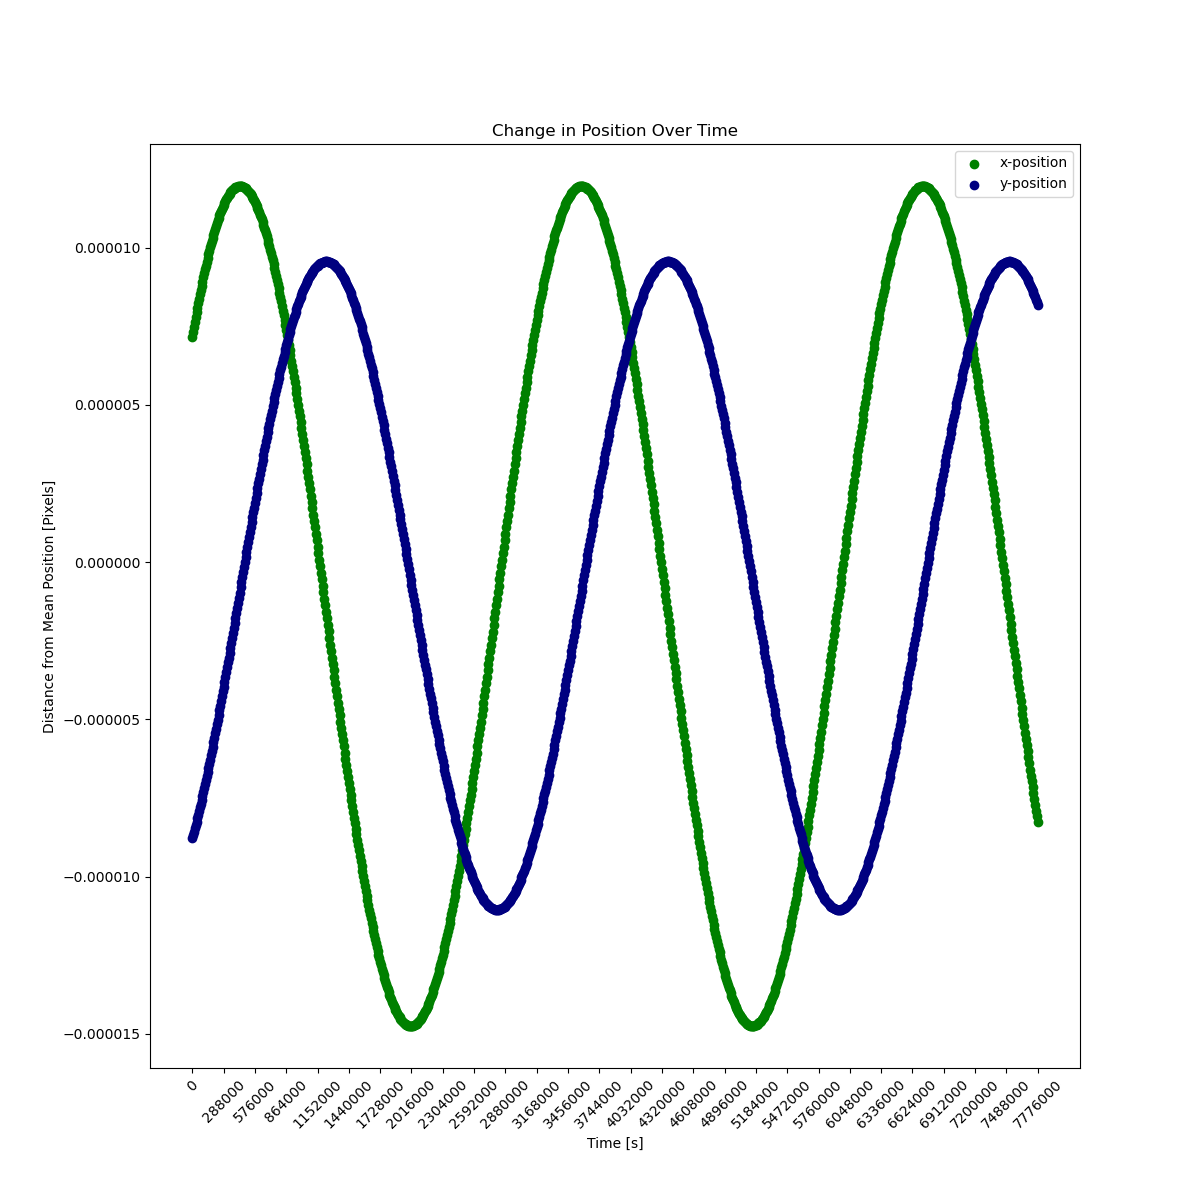

In [4]:
#creating figure of size 12x12 inches
plt.figure(figsize = (12,12))
ax = plt.subplot()

#plotting x vs time in green
plt.scatter(data.t, x_pix, color='Green')

#plotting y vs time in navy
plt.scatter(data.t, y_pix, color='navy')

#labeling x-axis as Time in units of seconds
plt.xlabel('Time [s]')

#labeling y-axis as difference from mean position in units of pixels
plt.ylabel('Distance from Mean Position [Pixels]')

#choosing only x-tick values that are integers
xticks = data.t[data.t%1000 <= 0.000000001]
ax.set_xticks(xticks)

#rotating x-tick labels for visibility
ax.xaxis.set_tick_params(rotation=45)

#using exact x and y values as ticks
ax.ticklabel_format(useOffset=False, style='plain')

#creating a legend for the plot
plt.legend(['x-position','y-position'])

#adding a title to the plot
plt.title('Change in Position Over Time')
plt.show()

## Plotting data with scientific notation:

<IPython.core.display.Javascript object>


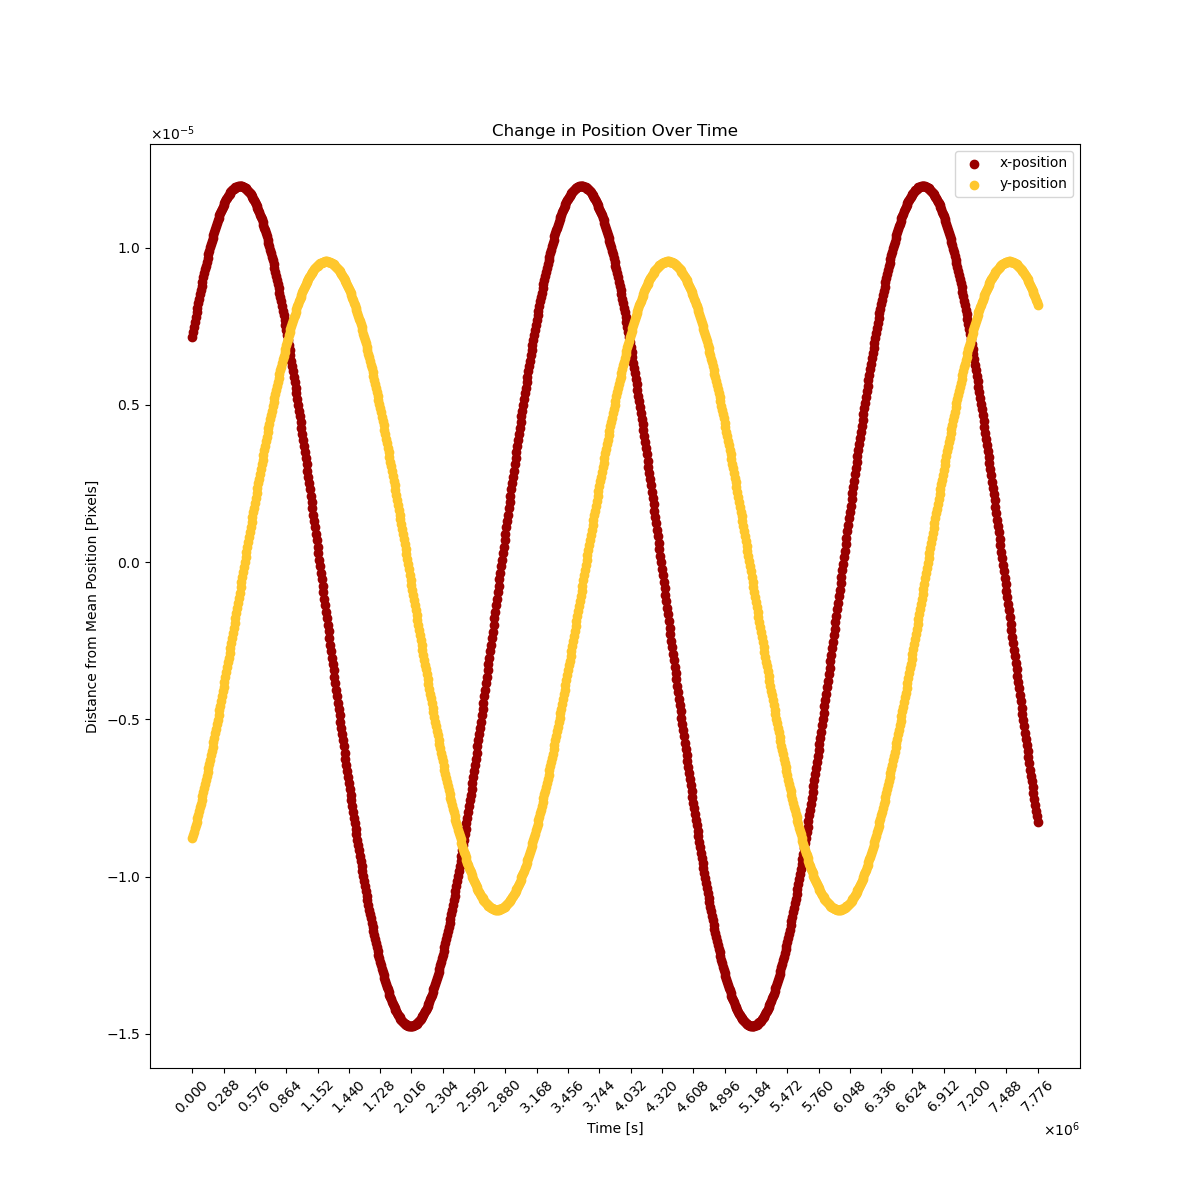

In [5]:
#creating figure of size 12x12 inches
plt.figure(figsize = (12,12))
ax = plt.subplot()

#plotting x vs time in cardinal red
plt.scatter(data.t, x_pix, color='#990000')

#plotting y vs time in gold
plt.scatter(data.t, y_pix, color='#FFC72C')

#labeling x-axis as Time in units of seconds
plt.xlabel('Time [s]')

#labeling y-axis as difference from mean position in units of pixels
plt.ylabel('Distance from Mean Position [Pixels]')

#choosing only x-tick values that are integers
xticks = data.t[data.t%1000 <= 0.000000001]
ax.set_xticks(xticks)

#rotating x-tick labels for visibility
ax.xaxis.set_tick_params(rotation=45)

#using scientific notation for x and y axis
ax.ticklabel_format(useMathText=True)

#creating a legend for the plot
plt.legend(['x-position','y-position'])

#adding a title to the plot
plt.title('Change in Position Over Time')
plt.show()

## Plotting x, y parametric t plot:

<IPython.core.display.Javascript object>


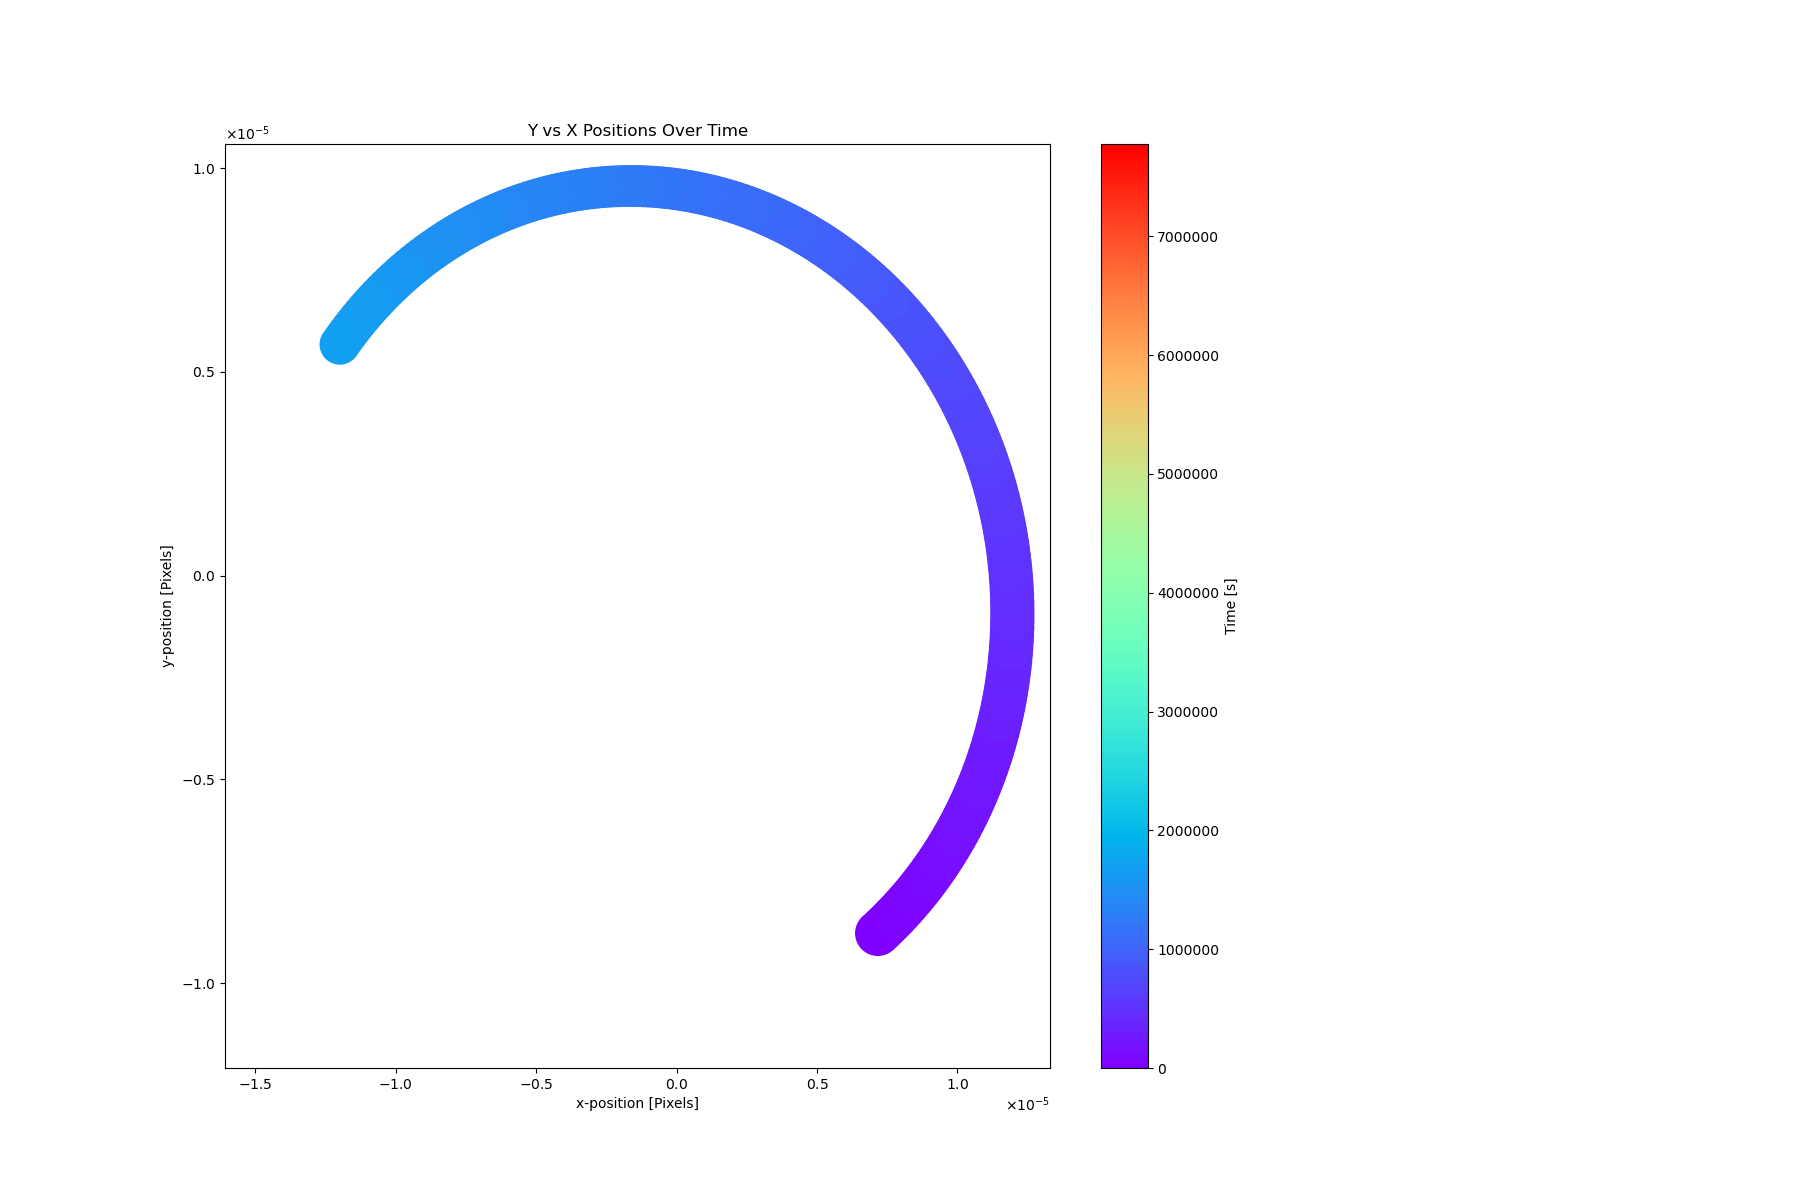

In [27]:
#creating figure of size 18x12 inches
fig = plt.figure(figsize = (18,12))
ax = plt.subplot(1,4,(1,3))

#plotting y vs x with the color of the points changing over time
scatter_plot = ax.scatter(x_pix, y_pix,c = data.t, cmap = 'rainbow', s=range(1010,10,-1))

#labeling x-axis as x-position with units of Pixels
plt.xlabel('x-position [Pixels]')

#labeling y-axis as y-position with units of Pixels
plt.ylabel('y-position [Pixels]')

#adding title to plot
plt.title('Y vs X Positions Over Time')

#adding Colorbar for time values
plt.colorbar(scatter_plot, format='%d', label = "Time [s]")

#axis labels use scientic notation
ax.ticklabel_format(useMathText=True)

#defines the update function which will be called for each frame in the animation
def update(frame):
    #slicing the data up to the current frame for x_pix, y_pix, t, and s
    x = x_pix[:frame]
    y = y_pix[:frame]
    c = data.t[:frame]
    s = range(1010,10,-1)[:frame]
    #stacking the x, y, and color data for this frame into a 2D array
    frame_data = np.stack([x, y, c]).T
    #updating the scatter plot with new positions and colors for this frame
    scatter_plot.set_offsets(frame_data)
    return scatter_plot
    
ani = animation.FuncAnimation(fig=fig, func=update, frames=1000, interval=1, blit=True)

plt.show()